In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv(r'D:\Buddi\buddi.ai\datas\data.txt',sep=' ',)
df.head()

,x,y
0,-30,2879.936493
1,-29,2696.403266
2,-28,2497.097949
3,-27,2369.455162
4,-26,2179.932915


# Problem

1. Write a program that will do a grid search on a, b, c to find the correct quadratic function that minimizes the error between expected Y and estimated Y for a given X.
2. You can use Mean Absolute Error (L1) or Mean Square Error (L2) as the error metric.
3. A quadratic equation is of the form Y = aX^2 + bX + c; this means every tuple generated by your grid search will give a quadratic that you will try to test against the <x,y> dataset.
4. Plot the <x,y> dataset to see the shape of the quadratic

## HinT

1. The function is a quadratic function
2. The values of a, b, and c are in the range [-5,5]
3. When you implement this your grid search will give out around 1331 tuples of (a,b,c)
4. When you measure the MAE or MSE, every tuple will give you an error estimate.  Now, pick the tuple that scores the minimum MAE or MSE, that becomes your final answer.



In [64]:
def grid_search(n,m):
    mae = []
    thetas = []
    for a in range(n,m+1,1):
        for b in range(n,m+1,1):
            for c in range(n,m+1,1):
                thetas.append([a,b,c])
                y_pred = a*(df['x']**2) + b*df['x'] + c
                error = df['y'] - y_pred
                mae.append(np.mean(error))
    return mae,thetas

def find_optimal(mae,thetas):
    best_mae = min(list(map(abs,mae)))
    index_mae = mae.index(best_mae)
    return thetas[index_mae],best_mae

def plot_qudratic(optimal_theta,data):
    pred = optimal_theta[0]*data['x']**2 + optimal_theta[1]*data['x'] + optimal_theta[2]
    plt.figure(figsize=(8,5),dpi=100)
    sns.set_style("darkgrid")
    sns.scatterplot('x','y',data=data)
    sns.lineplot(df['x'],pred,color='r')
    plt.text(-10, 1500, 'Parabola $Y = 3x^2+2x+5$', fontsize = 12, 
            bbox = dict(facecolor = 'red', alpha = 0.5))
    plt.title('Assignment3')
    plt.show()
        

1331
the optimal coefficent are : [3, 2, 5]
the mean_absolute_error : 21.08194725344262


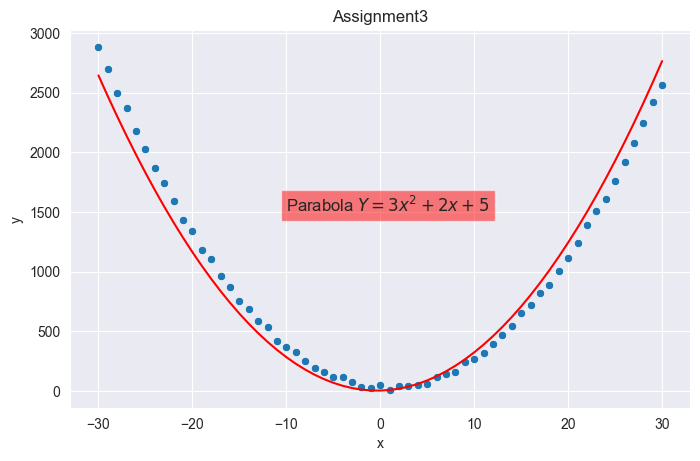

In [68]:
#solution
mae,thetas = grid_search(-5,5)
print(len(mae))#
best_theta,best_mae = find_optimal(mae,thetas)
print('the optimal coefficent are :',best_theta)
print('the mean_absolute_error :',best_mae)
plot_qudratic(best_theta,df)
    